In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import fbeta_score,accuracy_score,f1_score,roc_auc_score
from sklearn.feature_selection import SelectPercentile, f_classif,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
#Load data
train=pd.read_csv('../dataquest/train.csv') 
test=pd.read_csv('../Analytics/dataquest/test.csv')

In [4]:
train.isnull().sum()

victim_id                       0
incident_time                   0
incident_date                   0
incident_location             307
incident_tehsil                 0
cause_of_emergency              0
base_to_scene_distance          0
scene_to_hospital_distance      0
roadway_feature                 0
road_type                       0
surrounding_area                0
criticality                     0
dtype: int64

In [5]:
train.apply(lambda x:len(x.unique()))

victim_id                     11777
incident_time                 10752
incident_date                  2107
incident_location              5522
incident_tehsil                   7
cause_of_emergency               14
base_to_scene_distance           57
scene_to_hospital_distance       86
roadway_feature                   5
road_type                         2
surrounding_area                  6
criticality                       2
dtype: int64

In [6]:
#Setting incident time as index
train.incident_time=pd.to_datetime(train.incident_time,format='%H:%M:%S')
train['incident_time'] = [time.time() for time in train['incident_time']]
train.set_index('incident_time',inplace=True)
test.incident_time=pd.to_datetime(test.incident_time)
test['incident_time'] = [time.time() for time in test['incident_time']]
test.set_index('incident_time',inplace=True)
train.head()

,victim_id,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
incident_time,,,,,,,,,,,
22:23:19,VIC20120001987267,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
20:23:09,VIC20110002147887,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
20:37:15,VIC20090001391483,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
15:20:22,VIC20120000900722,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
16:22:17,VIC20100001241285,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


In [7]:
freq=train['incident_location'].value_counts()
cat_to_combine=freq.loc[freq.values<10].index
for c in cat_to_combine:
        train['incident_location'].replace({c:'other'},inplace=True)
        test['incident_location'].replace({c:'other'},inplace=True)

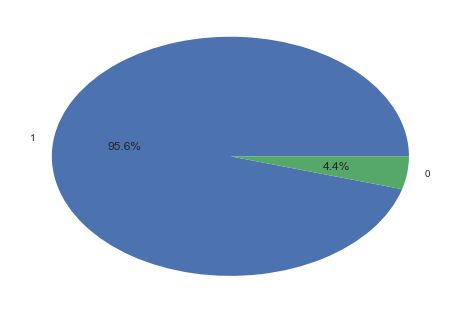

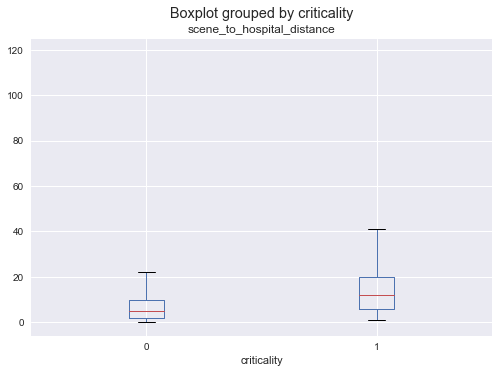

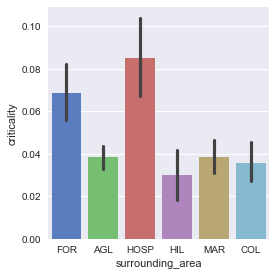

In [8]:
plt.pie(train.criticality.value_counts()/train.shape[0],labels=[1,0],autopct='%1.1f%%')
train.boxplot(column='scene_to_hospital_distance',by='criticality')
sns.factorplot(x="surrounding_area",y="criticality",data=train,kind="bar", palette = "muted")
plt.show()

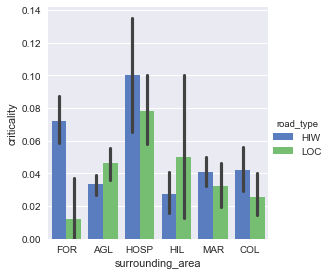

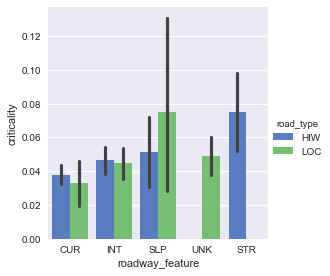

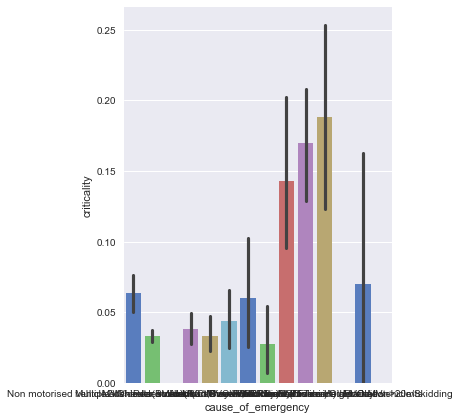

In [9]:
sns.factorplot(x="surrounding_area", y='criticality', hue="road_type", data=train,
                   kind="bar", palette="muted")
sns.factorplot(x="roadway_feature", y='criticality', hue="road_type", data=train,
                   kind="bar", palette="muted")
sns.factorplot(x="cause_of_emergency", y='criticality', data=train,
                  kind="bar", palette="muted",size=6)
plt.show()

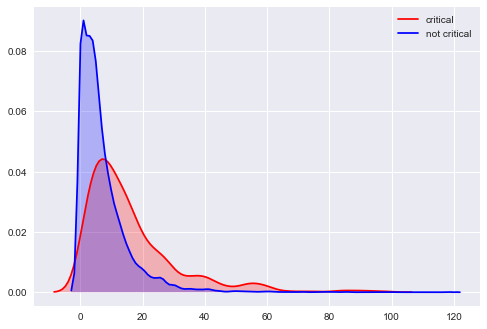

In [10]:
g=sns.kdeplot(train["scene_to_hospital_distance"][(train["criticality"] == 1)], color="Red", shade = True)
g=sns.kdeplot(train["scene_to_hospital_distance"][(train["criticality"] == 0)], color="blue", shade = True)
g.legend(['critical','not critical'])
plt.show()

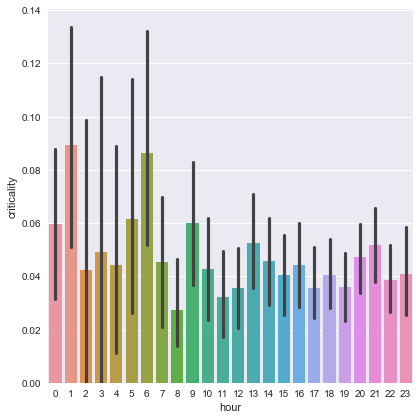

In [11]:
cat=['cause_of_emergency','roadway_feature','road_type','surrounding_area','incident_tehsil']
for i in cat:
    num=preprocessing.LabelEncoder()
    train[i]=num.fit_transform(train[i].astype(str))
    test[i]=num.transform(test[i].astype(str))

#In dataset time of accident is important feature as specific time ranges are more accident prone.
train['hour']=[t.hour for t in train.index]
test['hour']=[t.hour for t in test.index]
sns.factorplot(x="hour", y='criticality',  data=train,size=6,kind='bar')
plt.show()
#Best Features to fit in moddel
features=['cause_of_emergency','base_to_scene_distance','scene_to_hospital_distance','roadway_feature','road_type','surrounding_area','hour','incident_tehsil']

In [12]:
X=train[features].values
x=test[features].values
y=train['criticality'].values  

In [13]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
x = sc_X.transform(x)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

C:\Users\Inspire\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
#Random Forest classifier
import sklearn.ensemble
model=sklearn.ensemble.RandomForestClassifier()
model.fit(X_train,y_train)
y_pred0=model.predict(X_test)

In [15]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_test)

In [16]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()
clf1.fit(X_train,y_train)
y_pred2=clf1.predict(X_test)

In [17]:
#Boosting using voting classifier
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('bayes',clf),('lgs',clf1)], voting='soft', n_jobs=4)
votingC.fit(X_train,y_train)
y_pred5=votingC.predict(X_test)

In [18]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_mt=confusion_matrix(y_test,y_pred5,labels=[1,0])

In [19]:
cnf_mt

array([[  23,  189],
       [  83, 4416]], dtype=int64)

In [20]:
#Evaluating matrix is roc_auc score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
roc_auc_score = cross_val_score(estimator = votingC, X = X, y = y, cv = 5,scoring='roc_auc')
roc_auc_score.mean()

0.72044773344529012

In [22]:
roc_auc_score

array([ 0.74201096,  0.69602505,  0.74856047,  0.69655794,  0.71908425])